This notebook aims to group the download of data coming from https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form .

# Packages, functions and paths

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_74768\1754114704.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


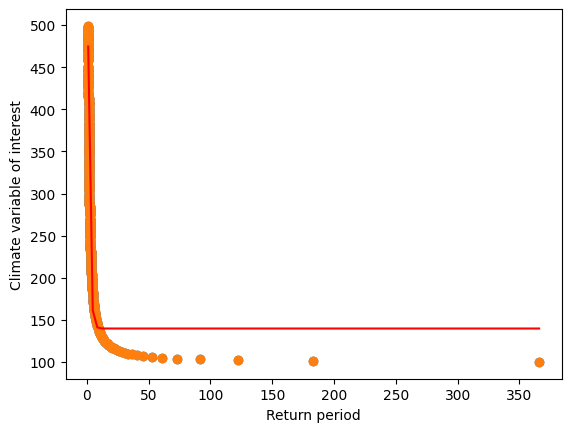

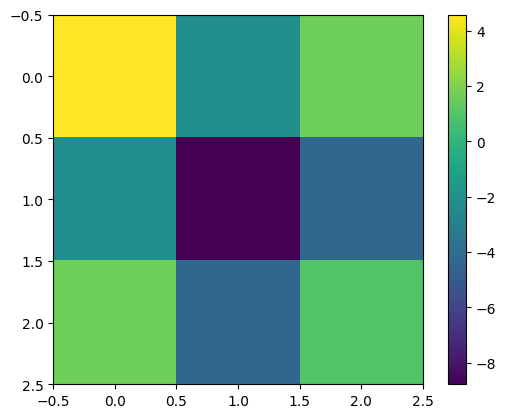

In [1]:
import geopandas as gpd
import os
import os.path
from netCDF4 import Dataset
import numpy as np

from FileManagement import download_extract
from FileManagement import path_length
from FunctionsAndClass import search_for_nc

In [2]:
#project locations (shapefile with location of elements to evaluate)
data_folder=r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets'
#data_folder=os.path.join(os.pardir,'dataset')
project_location_path=os.path.join(data_folder,'Mozambique_PPIS/EIB_locations_few.shp')
project_id='Name' #name of column used as id

#study boundary (optional)
study_area_path=os.path.join(data_folder,'Mozambique_PPIS/mozambique.shp')

#output folder
#out_path=r'\\COWI.net\projects\A245000\A248363\CRVA\Scripts\outputs'
out_path=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs'
out_path_database=r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets'
#projection CRS (default = 'EPSG:4326')
bCRS='EPSG:4326'

#buffer for climate/grid variables
buffer=40000 #buffer in meters, 0 = no buffer is computed

mCRS='EPSG:31983' #metric CRS for buffer in meters (find relevant metric CRS for location!)

# User input
Only the part of interest for the user will be downloaded.

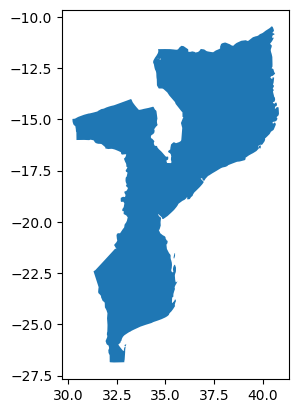

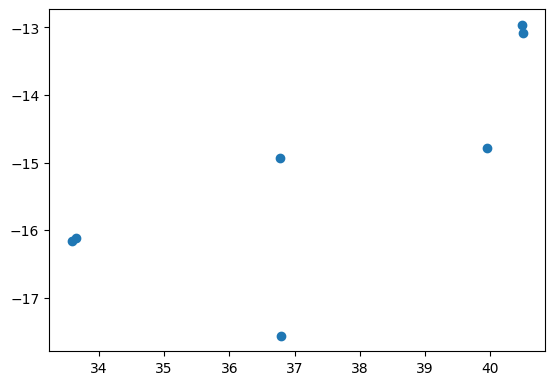

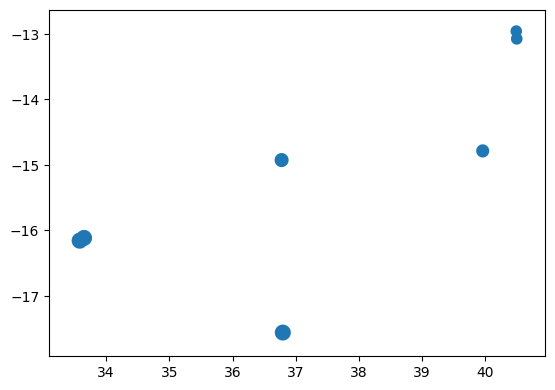

In [3]:
#load shapefiles
projects = gpd.read_file(project_location_path).to_crs(bCRS)
study_area = gpd.read_file(study_area_path).to_crs(bCRS)

#calculate buffer around points/shape
if buffer != 0:
    projects_buf=projects.to_crs(mCRS)  #project to crs with metric units to get buffer in meters
    projects_buf['geometry']=projects.to_crs(mCRS).buffer(buffer) #assign the buffer as the new geometry - 
    projects_buf=projects_buf.to_crs(bCRS)#project back to orginal crs

    
#plot shapefiles
study_area.plot()
projects.plot()
projects_buf.plot() 


#show table
projects[[project_id]]

# register geographic information concerning projects
lon_projects = projects['geometry'].x
lat_projects = projects['geometry'].y
buffer_project = 0.1
area_projects = [lat_projects - buffer_project, lat_projects+buffer_project, lon_projects-buffer_project,lon_projects+buffer_project] # list format

#### determination of the geographical zone of interest 
lat_min_wanted = min(study_area['LAT'])-10
lat_max_wanted = max(study_area['LAT'])+10
lon_min_wanted = min(study_area['LON'])-20
lon_max_wanted = max(study_area['LON'])+20
# addind and substracting to lon and lat to have margin
# substracting more to longitude because the range of longitude is -180 to 180. The range of latitude is -90 to 90

area = [lat_min_wanted, lon_min_wanted, lat_max_wanted,lon_max_wanted,] # used to download from copernicus

In [4]:
area_projects[1][0]

-16.0180719828059

In [5]:
projects['Name'][0]

'PT_Revubue 2 (Rev 2/01)'

# Precipitation

In [6]:
name_variable = 'precipitation' # only available on a monthly basis

### Historical data

### Projections

# Temperature

Need the maximum monthly near-surface temperature to compare to CRU data for downscaling
!!!! NEED TO CONVERT !!!! Need to sustract 273.15 to have data in degrees celsius, not in K anymore

In [7]:
name_variable = 'daily_maximum_near_surface_air_temperature'
temporal_resolution = 'monthly'

### Historical : from 1950 to 2014

In [8]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\temperature\Copernicus-CMIP6'

In [9]:
# download only for one model first

model = 'ec_earth3_cc'
name_project = projects['Name'][0]
name_project = name_project.replace('/','')
name_project = name_project.replace(' ','')

path_file = os.path.join(out_path, name_variable,name_project,'historical-1950-2014', temporal_resolution)
path_file_download = os.path.join(path_file,'download.zip')
path_file=path_length(path_file)
path_file_download=path_length(path_file_download)

import cdsapi

c = cdsapi.Client()

c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'variable': 'daily_maximum_near_surface_air_temperature',
        'temporal_resolution': 'monthly',
        'experiment': 'historical',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'year': [
            '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
        ],
        'model': model,
        'area': [
            area_projects[0][0], area_projects[1][0], area_projects[2][0],
            area_projects[3][0],
        ],
    },
    path_file_download)

download_extract(path_file,path_file_download)
os.remove(path_file_download)

2023-05-25 16:09:58,089 INFO Welcome to the CDS
2023-05-25 16:09:58,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2023-05-25 16:09:58,154 INFO Request is queued
2023-05-25 16:09:59,199 INFO Request is running
2023-05-25 17:12:34,042 INFO Request is completed
2023-05-25 17:12:34,077 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/adaptor.esgf_wps.retrieve-1685027504.1581244-29645-4-44818b25-326b-47db-9fdc-cf43896d0f7d.zip to \\COWI.net\projects\A245000\A248363\CRVA\Datasets\temperature\Copernicus-CMIP6\daily_maximum_near_surface_air_temperature\PT_Revubue2(Rev201)\historical-1950-2014\monthly\download.zip (12.2M)
2023-05-25 17:12:42,381 INFO Download rate 1.5M/s                                                                      


<zipfile.ZipFile filename='\\\\COWI.net\\projects\\A245000\\A248363\\CRVA\\Datasets\\temperature\\Copernicus-CMIP6\\daily_maximum_near_surface_air_temperature\\PT_Revubue2(Rev201)\\historical-1950-2014\\monthly\\download.zip' mode='r'>


PermissionError: [Errno 13] Permission denied

In [ ]:
path_file

In [ ]:
os.path.isdir(path_file)

In [ ]:
final_path=search_for_nc(path_file)

In [ ]:
df=Dataset(final_path)
height=np.ma.getdata(df.variables['height']).data # equal 2 m
tasmax=np.ma.getdata(df.variables['tasmax']).data

In [ ]:
tasmax - 273.15

In [ ]:
np.ma.getdata(df.variables['lat_bnds']).data

In [ ]:
df.variables